<a href="https://colab.research.google.com/github/shindeneha02/Loan-approval-prediction-by-applicant-details/blob/main/Project(loan_approval).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning Problem Statement:

> Objective
: Build a predictive model to determine the likelihood of loan   
             approval based on applicant details.

> Tasks:
  1.Preprocess the data by handling missing values and encoding categorical
  variables.
  2. show how people get the loan on which on different variable basis.
  3.Split the dataset into training and testing sets.
  4.Train a classification model (e.g., Logistic Regression, Decision Trees,
  Random Forest) to predict Loan_Status.
  5.Evaluate the model using accuracy, precision, recall, and F1-score.

Importing libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Data Collection and Processing**

In [4]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('/content/drive/MyDrive/Loan approval dataset') #loan_dataset is dataframe name.

In [5]:
type(loan_dataset) #checking type of loan_datase

pandas.core.frame.DataFrame

In [6]:
# printing the first 5 rows of the dataframe
loan_dataset.head()
# or loan_dataset.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [7]:
# printing last 5 rows of dataframe
loan_dataset.tail() #or loan_dataset.tail(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [8]:
# show number of rows and columns
loan_dataset.shape # returns (rows,columns)

(614, 13)

In [9]:
loan_dataset.columns # shows all columns of dataframe

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
loan_dataset.info()# shows summary of dataframe such as non null values , dtypes of variables



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
# statistical measures
loan_dataset.describe() # provides statistical summary also this function provides valuable insights into the distribution, central tendency.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Data Cleaning


In [12]:
# number of missing values in each column
loan_dataset.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
# number of missing values in each column
loan_dataset.isnull().sum() #returns sum value count of null values of each columns

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [14]:
# number of missing values in each column
loan_dataset.Loan_ID.isnull().head(20)
# same we can check true false value of every field where true means null and false means not null

,Loan_ID
0,False
1,False
2,False
3,False
4,False
5,False
6,False
7,False
8,False
9,False


Boxplot for checking Outliers

<Axes: >

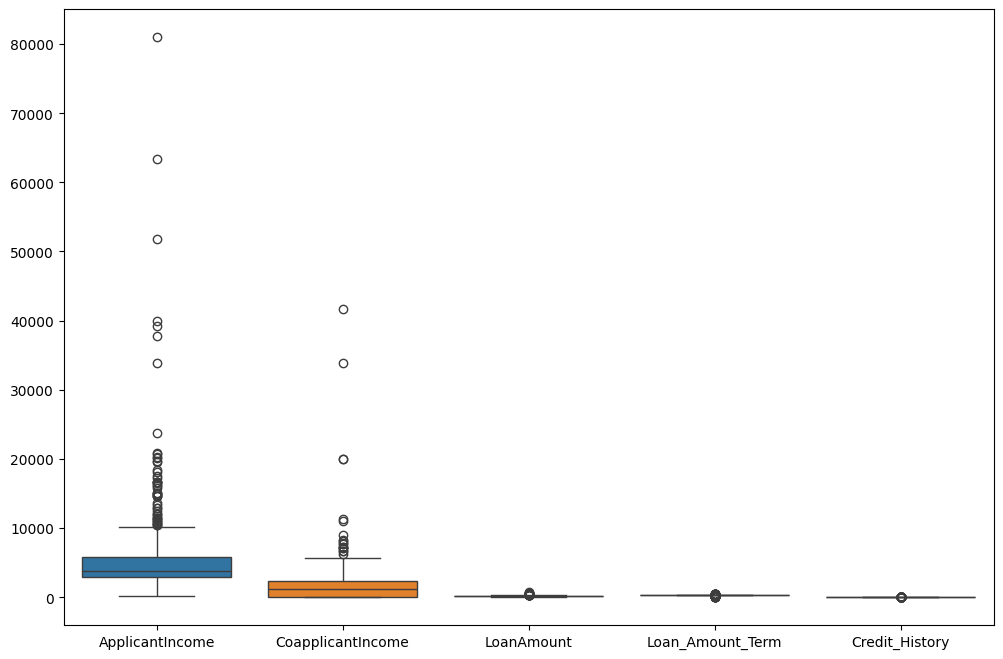

In [15]:
## Checking the outliers
#A boxplot (also known as a box-and-whisker plot)
#is a statistical graph that provides a visual summary of a dataset, highlighting its central tendency, variability, and the presence of outliers.

plt.figure(figsize=(12,8))
sns.boxplot(data = loan_dataset)

handling Null values

In [16]:
mean_value = loan_dataset['LoanAmount'].mean()
loan_dataset['LoanAmount'].fillna(value=mean_value, inplace=True)

In [17]:
loan_dataset.LoanAmount.isnull().sum()

0

In [18]:
loan_dataset['Loan_Amount_Term'] = loan_dataset['Loan_Amount_Term'].fillna(loan_dataset['Loan_Amount_Term'].mean())
loan_dataset['Credit_History'] = loan_dataset['Credit_History'].fillna(loan_dataset['Credit_History'].mean())


In [19]:
# number of missing values in each column after handeling null values
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [20]:
# dropping the missing values
loan_dataset = loan_dataset.dropna()

In [21]:
# number of missing values in each column
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


Feature Engineering
    - Encoding categorial variables
    - modify existing feature

In [22]:
# label encoding
loan_dataset.replace({"Loan_Status":{'N':0,'Y':1}},inplace=True)

In [23]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,1


In [24]:
# Dependent column values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,319
1,95
2,94
3+,46


In [25]:
# replacing the value of 3+ to 4
loan_dataset = loan_dataset.replace(to_replace='3+', value=4)

In [26]:
# dependent values
loan_dataset['Dependents'].value_counts()

,count
Dependents,
0,319
1,95
2,94
4,46


In [27]:
# convert categorical columns to numerical values
loan_dataset.replace({'Married':{'No':0,'Yes':1},'Gender':{'Male':1,'Female':0},'Self_Employed':{'No':0,'Yes':1},
                      'Property_Area':{'Rural':0,'Semiurban':1,'Urban':2},'Education':{'Graduate':1,'Not Graduate':0}},inplace=True)

In [28]:
loan_dataset.head() #checking wheather text value converted or not

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


EDA=Exploratory Data Analysis ->
Checking relationships between different variables to gain insights

Number of people who took loan by Property_Area
Property_Area
1    211
2    180
0    163
Name: count, dtype: int64


<Axes: xlabel='Property_Area', ylabel='count'>

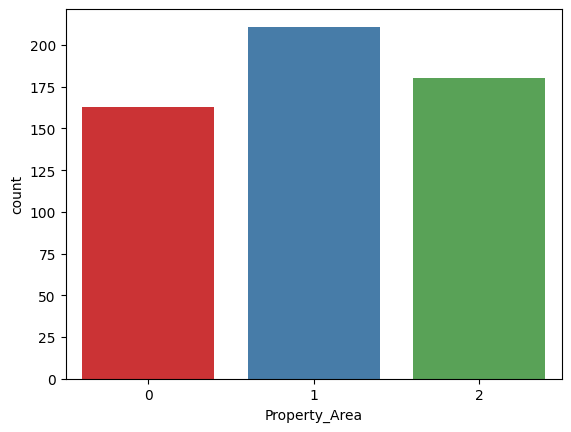

In [29]:
#checking peoples who took loan by Property_Area
print('Number of people who took loan by Property_Area')
print(loan_dataset['Property_Area'].value_counts()) # Rural:0,semiurban:1,Urban:2
sns.countplot(x='Property_Area',data = loan_dataset,palette='Set1')

Number of people who took loan by credit history
Credit_History
1.000000    431
0.000000     80
0.842199     43
Name: count, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

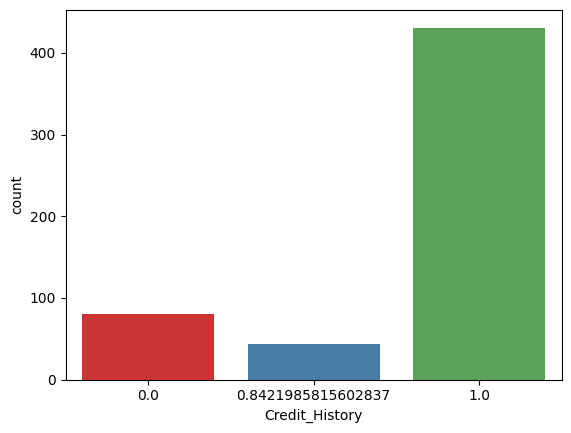

In [30]:
#checking peoples who took loan by Credit history
print('Number of people who took loan by credit history')
print(loan_dataset['Credit_History'].value_counts()) # 1 good credit history, 0.8 avg credit history, 0.0 bad credit history
sns.countplot(x='Credit_History',data = loan_dataset,palette='Set1')

Number of people who took loan by Dependents
Dependents
0    319
1     95
2     94
4     46
Name: count, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

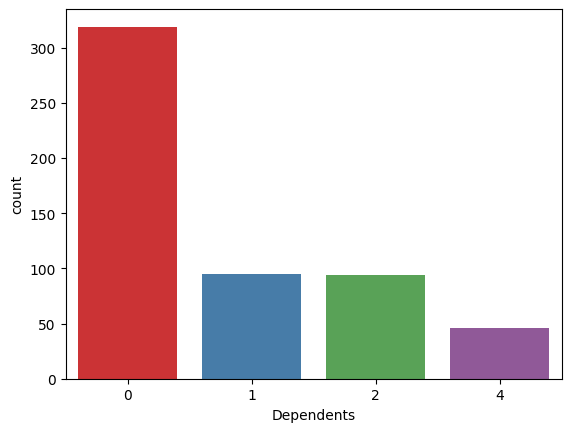

In [31]:
#checking peoples who took loan by dependents
print('Number of people who took loan by Dependents')
print(loan_dataset['Dependents'].value_counts())
sns.countplot(x='Dependents',data = loan_dataset,palette='Set1')

Number of people who took loan by gender
Gender
1    453
0    101
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

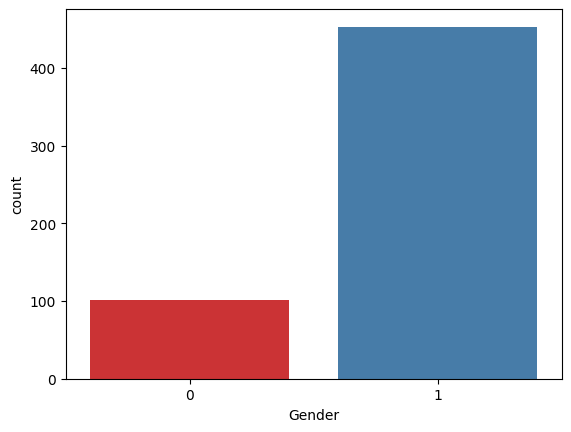

In [32]:
#checking peoples who took loan by their gender
print('Number of people who took loan by gender')
print(loan_dataset['Gender'].value_counts())
sns.countplot(x='Gender',data = loan_dataset,palette='Set1')

Number of people who took loan by Married
Married
1    362
0    192
Name: count, dtype: int64


<Axes: xlabel='Married', ylabel='count'>

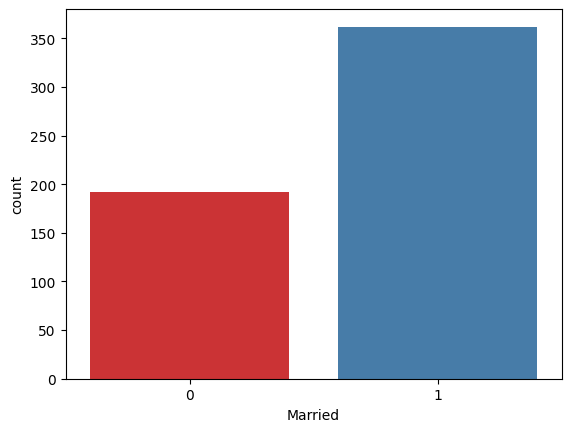

In [33]:
#how many peoples took loan on their marital status basis
print('Number of people who took loan by Married')
print(loan_dataset['Married'].value_counts())
sns.countplot(x='Married',data = loan_dataset, palette='Set1')

Number of people who took loan by Education
Education
1    431
0    123
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

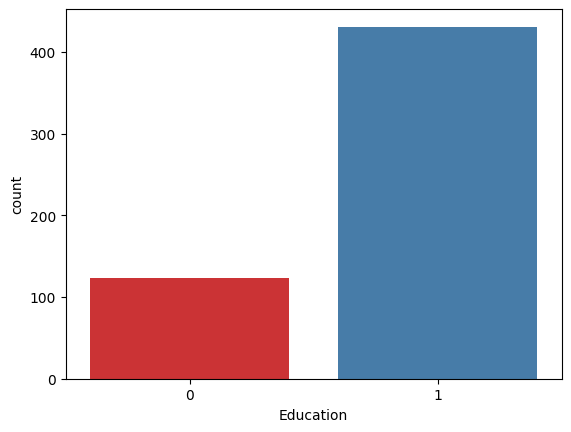

In [34]:
# how many peoples took loan on basis of graduation
print('Number of people who took loan by Education')
print(loan_dataset['Education'].value_counts())
sns.countplot(x='Education',data = loan_dataset,palette='Set1')


Exploring the relationship between credit history and loan approval.

Loan_Status             0          1
Credit_History                      
0.000000        91.250000   8.750000
0.842199        18.604651  81.395349
1.000000        21.113689  78.886311


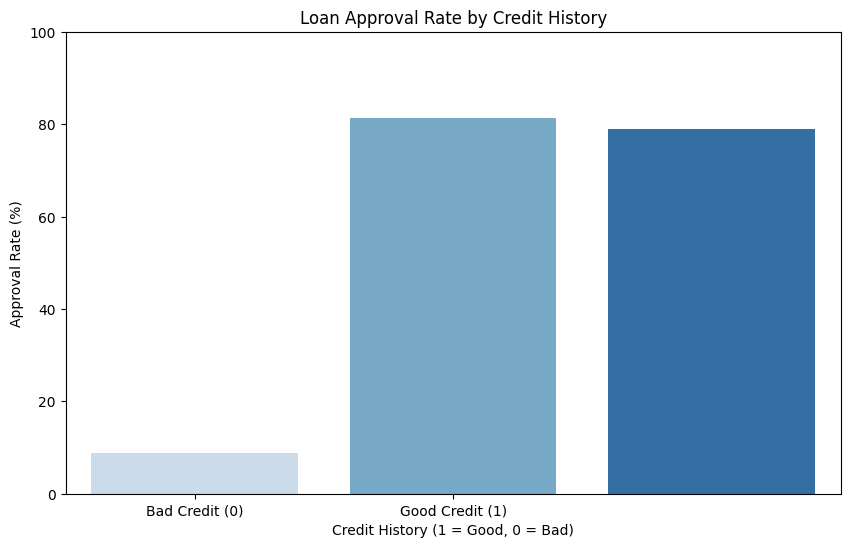

In [35]:

# Check the distribution of Loan_Status based on Credit_History
credit_vs_approval = loan_dataset.groupby('Credit_History')['Loan_Status'].value_counts(normalize=True).unstack() * 100

# Display the table showing loan approval and rejection percentages by credit history
print(credit_vs_approval)

# Visualize the relationship using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=credit_vs_approval.index, y=credit_vs_approval[1], palette='Blues', ci=None)
plt.title('Loan Approval Rate by Credit History')
plt.xlabel('Credit History (1 = Good, 0 = Bad)')
plt.ylabel('Approval Rate (%)')
plt.xticks([0, 1], ['Bad Credit (0)', 'Good Credit (1)']) #Good Credit History (1): High approval rates suggest that having a reliable repayment history is a strong positive indicator for loan approval.
                                                          #Bad Credit History (0): Low approval rates indicate that a poor credit history negatively impacts loan decisions.
plt.ylim(0, 100)
plt.show()

In [36]:
loan_dataset.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [37]:
loan_dataset.dtypes

,0
Loan_ID,object
Gender,int64
Married,int64
Dependents,object
Education,int64
Self_Employed,int64
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [38]:
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


Data Splitting-> splitting data set into training and testing data

In [39]:
# separating the data and label
X = loan_dataset.drop(columns=['Loan_ID','Loan_Status'],axis=1)# axis 1 for columns
Y = loan_dataset['Loan_Status']

In [40]:
print(X)
print(Y)

     Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0          0          1              0             5849   
1         1        1          1          1              0             4583   
2         1        1          0          1              1             3000   
3         1        1          0          0              0             2583   
4         1        0          0          1              0             6000   
..      ...      ...        ...        ...            ...              ...   
609       0        0          0          1              0             2900   
610       1        1          4          1              0             4106   
611       1        1          1          1              0             8072   
612       1        1          2          1              0             7583   
613       0        0          0          1              1             4583   

     CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_Hi

importing libraries for Model Training

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import svm # svm- support vector machine used for classification , regression task
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [42]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1,stratify=Y,random_state=2)

In [43]:
## Logistic Regression
model1 = LogisticRegression()
model1.fit(X_train,Y_train)
y_pred_model1 = model1.predict(X_test)
accuracy1= accuracy_score(Y_test,y_pred_model1)

In [44]:
accuracy1*100

80.35714285714286

In [45]:
## Decision Tree Classifier

model2 = DecisionTreeClassifier()
model2.fit(X_train,Y_train)
y_pred_model2 = model2.predict(X_test)
accuracy2 = accuracy_score(Y_test,y_pred_model2)
print("Accuracy score of Decision Tree: ", accuracy2*100)

Accuracy score of Decision Tree:  69.64285714285714


In [46]:
## Random Forest Classifier
model3 = RandomForestClassifier()
model3.fit(X_train,Y_train)
y_pred_model3 = model3.predict(X_test)
accuracy3 = accuracy_score(Y_test,y_pred_model3)
print("Accuracy score of Random Forest: ", accuracy3*100)

Accuracy score of Random Forest:  78.57142857142857


In [47]:
#KNearestNeighbors model
model4 = KNeighborsClassifier(n_neighbors=3)
model4.fit(X_train,Y_train)
y_pred_model4 = model4.predict(X_test)
accuracy4 = accuracy_score(Y_test,y_pred_model4)
print("Accuracy score of KNeighbors: ", accuracy4*100)

Accuracy score of KNeighbors:  53.57142857142857


In [48]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name,y_test,y_pred):
  report = classification_report(y_test,y_pred)
  print(f"Classification Report For {model_name}:\n{report}\n")

generate_classification_report(model1,Y_test,y_pred_model1)
generate_classification_report(model2,Y_test,y_pred_model2)
generate_classification_report(model3,Y_test,y_pred_model3)
generate_classification_report(model4,Y_test,y_pred_model4)

Classification Report For LogisticRegression():
              precision    recall  f1-score   support

           0       0.88      0.41      0.56        17
           1       0.79      0.97      0.87        39

    accuracy                           0.80        56
   macro avg       0.83      0.69      0.72        56
weighted avg       0.82      0.80      0.78        56


Classification Report For DecisionTreeClassifier():
              precision    recall  f1-score   support

           0       0.50      0.41      0.45        17
           1       0.76      0.82      0.79        39

    accuracy                           0.70        56
   macro avg       0.63      0.62      0.62        56
weighted avg       0.68      0.70      0.69        56


Classification Report For RandomForestClassifier():
              precision    recall  f1-score   support

           0       0.78      0.41      0.54        17
           1       0.79      0.95      0.86        39

    accuracy                

In [49]:
models = pd.DataFrame({
    'Model' : ['logistic regrssion','Decision Tree', 'Random Forest','XgBoost'],
    'Score' : [accuracy1*100,accuracy2*100,accuracy3*100,accuracy4*100]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,logistic regrssion,80.357143
2,Random Forest,78.571429
1,Decision Tree,69.642857
3,XgBoost,53.571429


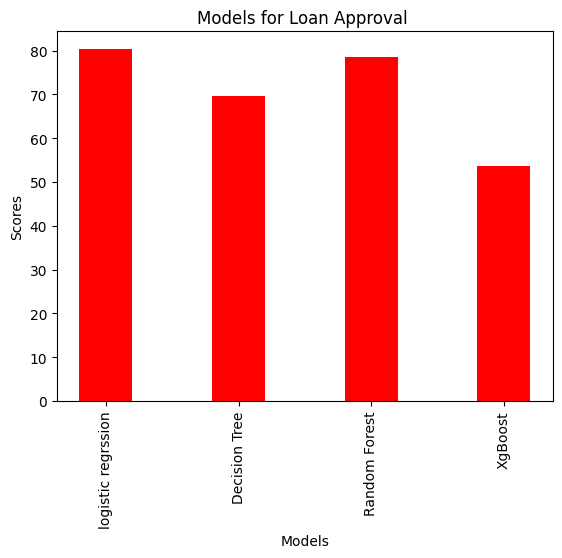

In [50]:
plt.bar(models['Model'],models['Score'], width=0.4, color='Red')
plt.xlabel("Models")
plt.xticks(rotation=90)
plt.ylabel("Scores")
plt.title("Models for Loan Approval ")
plt.show()

#Above a list of each algorithm, the bar chart shows that the spread of the accuracy scores across each cross validation fold for each algorithm.
# It is clear that the Logistic regression and random forest is good enough for both feature selection (80% and 80% accuracy) as model selection.



> Actionable Insights and Recommendations


1.   Focus on Credit History Improvement Programs:

    Insight: Applicants with a good credit history have significantly higher approval rates compared to those with poor credit history.
    Recommendation: Implement credit counseling and financial literacy programs to help applicants understand and improve their credit scores. Offer products like secured credit cards or credit-building loans to assist customers in building positive credit histories.
2.   Adjust Loan Amount Thresholds for Risky Applicants:

    Insight: Higher loan amounts are associated with a lower approval rate, particularly for applicants with lower income levels.
    Recommendation: Introduce tiered loan amount policies based on risk assessments. Consider lowering loan amounts or offering partial approvals for high-risk applicants. Implement tighter controls on the maximum loan amount offered to applicants with borderline credit scores.
3.  Offer Tailored Loan Products for Different Applicant Profiles:

    Insight: Different applicant segments (e.g., self-employed vs. salaried, urban vs. rural) may have varying approval rates due to differing financial stability.
    Recommendation: Customize loan products based on applicant profiles. For example, offer lower initial interest rates or flexible repayment terms for self-employed individuals who may have irregular income. Create products tailored to first-time borrowers with smaller loan amounts and quicker approvals to build trust and long-term relationships.
4. Enhance Pre-Qualification and Risk Assessment Processes:

    Insight: Clear patterns in the data indicate which financial profiles are likely to be approved or rejected.
    Recommendation: Use predictive models in pre-qualification stages to assess the likelihood of approval before a full application is submitted. This approach can filter out high-risk applicants early, saving time and resources. Develop machine learning models that continuously learn from approved and rejected applications to refine approval criteria.



